In [100]:
from numpy import loadtxt
from obspy import UTCDateTime
from numpy import array
#time, lad, long, depth, mag, gap, dmin, rms, horizontal error, depth error, and mag error which corredponds to indexes 0,1,2,3,4,7,8,9,15,16,17 in the original data
dataset = loadtxt(r"C:\Users\UnitTest\Downloads\query.csv", dtype = str, delimiter=",", comments='#', usecols=(0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20), encoding="utf8")
#This code correctly parses data so commas in the names of the data pieces dont interfere with parsing
#The values kept are time, lad, long, depth, mag, gap, dmin, rms, horizontal error, depth error, and mag error which corredponds to indexes 0,1,2,3,4,7,8,9,15,16,17 in the original data
datasetCorrected = []
for i in range(len(dataset)):
    for y in range(11,25):
        if(dataset[i][y]=="earthquake"):#"Earthquake" is the marker used to parse properly
            tempArr = []
            for x in range(11):
                if(x<8):
                    tempArr.append(dataset[i][x])
            for x in range(1,4):
                tempArr.append(dataset[i][x+y])
            datasetCorrected.append(array(tempArr))
            break
            
dataset = array(datasetCorrected)

In [219]:

#This code block determines which earthquakes are aftershocks (or are mainshocks after foreshocks)
#by using the times between the earthquakes as well as their location (laditude and longitude)
aftshockDisMax = 1 
dataSetFilt = []
data1 = array([[0,2],[3,4]])
noAfter = 0.0
after = 0.0
currentDay = None
quakes = []
for i in dataset:
    nothingAdded = True  
    time = UTCDateTime(i[0])
    if (currentDay !=None and currentDay-time < 86400):#86400 seconds is 24 fours
        for trace in quakes:
            if(abs(float(trace[1]) - float(i[1]))<aftshockDisMax and abs(float(trace[2]) - float(i[2]))<aftshockDisMax):
                quakes.remove(trace)
                clone = []
                for y in range(len(i)):
                    clone.append(i[y])
                clone.append(1)
                quakes.append(clone)
                nothingAdded = False
                
                after +=1
        if (nothingAdded):
            clone = []
            for y in range(len(i)):
                clone.append(i[y])
            clone.append(0)
            quakes.append(clone)
            
            noAfter +=1
    else:
        for trace in quakes:
            #print(trace)
            dataSetFilt.append(trace)
        quakes.clear()
        currentDay = time
        clone = []
        for y in range(len(i)):
            clone.append(i[y])
        clone.append(0)
        quakes.append(clone)
        
        noAfter +=1
        

tempArrHolder = []

dataSetFilt = array(dataSetFilt)
dataSetFiltWithTime = dataSetFilt
dataSetFilt = dataSetFilt[:,1:12]
for i in dataSetFilt:
    excludeArr = False
    tempArr = []
    for x in range(len(i)):
        if (i[x]!=""):
            tempArr.append(float(i[x]))
        else:
            tempArr.append(0)
            excludeArr = True
            
    if (excludeArr==False):#IMPORTANT THING HERE (More Accurate!)
        tempArrHolder.append(tempArr)
dataSetFilt = array(tempArrHolder)


#This data reduces the dataSet to its first four values
smallDataSet = []
for i in range(len(dataSetFilt)):
    smallArr = []
    for x in range(len(dataSetFilt[i])):
        if(x==6):#6 was the original
            smallArr.append(dataSetFilt[i][len(dataSetFilt[i])-1])
            break
        smallArr.append(dataSetFilt[i][x])
        
    smallDataSet.append(smallArr)
smallDataSet = array(smallDataSet)
#int(smallDataSet)


In [57]:
from obspy.clients.fdsn import RoutingClient 
from obspy import Stream

streamTotal = Stream(traces=None)
client = RoutingClient("iris-federator")
smallestStream = None
for x in range(500):#len(dataSetFiltWithTime)
    time = dataSetFiltWithTime[x][0]
    st = client.get_waveforms(
        channel="LHZ", starttime=UTCDateTime(time),
        endtime=UTCDateTime(time[:len(time)-1]+"-00:05"), latitude=float(dataSetFiltWithTime[x][1]),
        longitude=float(dataSetFiltWithTime[x][2]), maxradius=25, longestonly = False)  

    traceMax = None
    for i in st:
        if (traceMax == None or traceMax.max() > traceMax.max()):
            traceMax = i
    print(x)
    streamTotal.append(traceMax)
    if(smallestStream==None or len(traceMax) < smallestStream):
        smallestStream = len(traceMax)
streamTotal.normalize()

print("The smallest stream length is: " + str(smallestStream))
print(" ")
waveformArr = []
for i in range(len(streamTotal)):
    numArr = []
    traceLength = len(streamTotal[i])
    #print(traceLength)
    #streamTotal[i].plot()
    for x in range(smallestStream):
        numArr.append(streamTotal[i][x])
    numArr.append(dataSetFilt[i][len(dataSetFilt[i])-1])
    waveformArr.append(numArr)
# try this with the numbers all being positive

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


C:\Users\UnitTest\anaconda3\envs\tf\lib\site-packages\obspy\clients\fdsn\routing\routing_client.py:93: UserWarning: Failed to download data of type 'waveform' from 'http://www.orfeus-eu.org' due to: 
Traceback (most recent call last):
  File "C:\Users\UnitTest\anaconda3\envs\tf\lib\http\client.py", line 560, in _get_chunk_left
    chunk_left = self._read_next_chunk_size()
  File "C:\Users\UnitTest\anaconda3\envs\tf\lib\http\client.py", line 527, in _read_next_chunk_size
    return int(line, 16)
ValueError: invalid literal for int() with base 16: b''

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\UnitTest\anaconda3\envs\tf\lib\http\client.py", line 577, in _readall_chunked
    chunk_left = self._get_chunk_left()
  File "C:\Users\UnitTest\anaconda3\envs\tf\lib\http\client.py", line 562, in _get_chunk_left
    raise IncompleteRead(b'')
http.client.IncompleteRead: IncompleteRead(0 bytes read)

During handling of the

101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350


In [227]:
from numpy import loadtxt
from numpy import append
import random
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf



def showDataModel(splitData, dataInput):
    dataRowLen = len(dataInput)
    dataColLength = len(dataInput[0])
    
    X = None
    Y = None
    Xtest = None
    Ytest = None
    if(splitData==False):
        X = dataInput[:,:dataColLength-1]#2d arrays
        Y = dataInput[:,dataColLength-1]
        Xtest = X
        Ytest = Y
    else:
        dataSetFiltRand = []
        numHolder = []
        for i in range(len(dataInput)):
            numHolder.append(i)
        random.shuffle(numHolder)
        for i in range(len(dataInput)):
            dataSetFiltRand.insert(numHolder[i], dataInput[i]) 
        dataSetFiltRand = array(dataSetFiltRand)
        X = dataSetFiltRand[:int(dataRowLen/2),:dataColLength-1]
        Y = dataSetFiltRand[:int(dataRowLen/2),dataColLength-1]
        Xtest = dataSetFiltRand[int(dataRowLen/2):,:dataColLength-1]
        Ytest = dataSetFiltRand[int(dataRowLen/2):,dataColLength-1]
    
    model = Sequential()
    model.add(Dense(12, input_dim= dataColLength-1, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X,Y, epochs=150, batch_size=16, shuffle=True)
    
    _, accuracy = model.evaluate(Xtest, Ytest)
    print('Accuracy: %.2f'%(accuracy*100))#'Accuracy: %.2f'%
    predictions = model.predict(Xtest)
    classes= argmax(predictions,axis=1)
    #for i in range(300):
        #print("Guessed ",classes[i]," expected: ", Ytest[i])
    print (after/noAfter)
showDataModel(True,dataSetFilt)



Epoch 1/150
21/21 [==============================] - 0s 1ms/step - loss: 17.0496 - accuracy: 0.1220
Epoch 2/150
21/21 [==============================] - 0s 1ms/step - loss: 9.6475 - accuracy: 0.2317
Epoch 3/150
21/21 [==============================] - 0s 900us/step - loss: 5.0793 - accuracy: 0.3354
Epoch 4/150
21/21 [==============================] - 0s 1ms/step - loss: 1.5540 - accuracy: 0.5244
Epoch 5/150
21/21 [==============================] - 0s 950us/step - loss: 0.5287 - accuracy: 0.8201
Epoch 6/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.8628
Epoch 7/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8750
Epoch 8/150
21/21 [==============================] - 0s 850us/step - loss: 0.4143 - accuracy: 0.8598
Epoch 9/150
21/21 [==============================] - 0s 900us/step - loss: 0.3876 - accuracy: 0.8689
Epoch 10/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8841


21/21 [==============================] - 0s 1ms/step - loss: 0.2008 - accuracy: 0.9360
Epoch 83/150
21/21 [==============================] - 0s 1ms/step - loss: 0.2000 - accuracy: 0.9390
Epoch 84/150
21/21 [==============================] - 0s 900us/step - loss: 0.1971 - accuracy: 0.9390
Epoch 85/150
21/21 [==============================] - 0s 950us/step - loss: 0.2023 - accuracy: 0.9390
Epoch 86/150
21/21 [==============================] - 0s 950us/step - loss: 0.1957 - accuracy: 0.9390
Epoch 87/150
21/21 [==============================] - 0s 901us/step - loss: 0.1953 - accuracy: 0.9390
Epoch 88/150
21/21 [==============================] - 0s 950us/step - loss: 0.1983 - accuracy: 0.9390
Epoch 89/150
21/21 [==============================] - 0s 950us/step - loss: 0.1940 - accuracy: 0.9390
Epoch 90/150
21/21 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9390
Epoch 91/150
21/21 [==============================] - 0s 900us/step - loss: 0.1890 - accuracy: 0.9390

In [228]:
# split into input (X) and output (y) variables
from numpy import argmax
waveformArr = array(waveformArr)
def showWaveformModel(splitData):
    X = None
    Y = None
    Xtest = None
    Ytest = None
    if(splitData==False):
        X = waveformArr[:,:300]#2d arrays
        Y = waveformArr[:,300]
        Xtest = X
        Ytest = Y
    else:
        waveformArrRand = []
        numHolder = []
        for i in range(len(waveformArr)):
            numHolder.append(i)
        random.shuffle(numHolder)
        for i in range(len(waveformArr)):
            waveformArrRand.insert(numHolder[i], waveformArr[i]) 
        waveformArrRand = array(waveformArrRand)
        X = waveformArrRand[:250,:300]
        Y = waveformArrRand[:250,300]
        Xtest = waveformArrRand[250:,:300]
        Ytest = waveformArrRand[250:,300]
    SaveXtest = Xtest
    SaveYtest = Ytest
    #Model is created, compiled, and evaluated
    model = Sequential()
    model.add(Dense(12, input_dim=300, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X2,Y2, epochs=150, batch_size=16, shuffle=True)
    _, accuracy2 = model.evaluate(X2test, Y2test)
    print('Accuracy: %.2f'%(accuracy2*100))#'Accuracy: %.2f'%
    
    predictions = model.predict(Xtest)
    classes= argmax(predictions,axis=1)
    # summarize the first 5 cases
    #for i in range(300):
        #print("Guessed ",classes[i]," expected: ", Ytest[i])
    print (after/noAfter)
showWaveformModel(False)



Epoch 1/150
16/16 [==============================] - 0s 4ms/step - loss: 0.6211 - accuracy: 0.8040
Epoch 2/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.8800
Epoch 3/150
16/16 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.8880
Epoch 4/150
16/16 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.8880
Epoch 5/150
16/16 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8840
Epoch 6/150
16/16 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.8840
Epoch 7/150
16/16 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8840
Epoch 8/150
16/16 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.8840
Epoch 9/150
16/16 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8840
Epoch 10/150
16/16 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8840
Epoch 11/

Epoch 83/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.9600
Epoch 84/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.9680
Epoch 85/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9640
Epoch 86/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9600
Epoch 87/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.9640
Epoch 88/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9520
Epoch 89/150
16/16 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9640
Epoch 90/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.9680
Epoch 91/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9680
Epoch 92/150
16/16 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9720


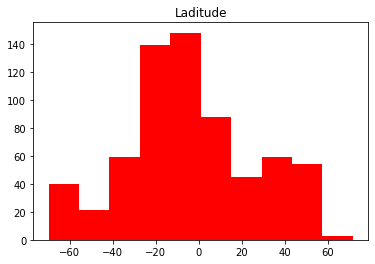

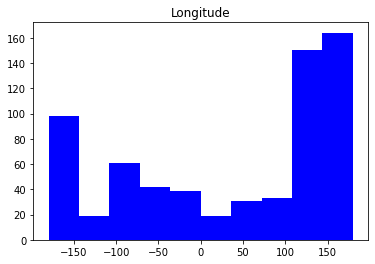

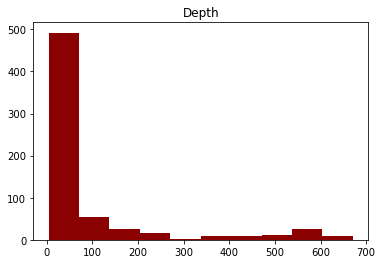

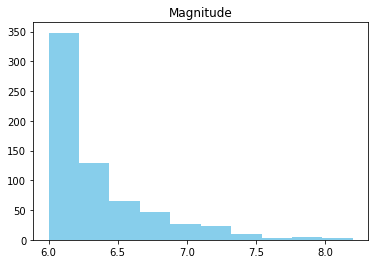

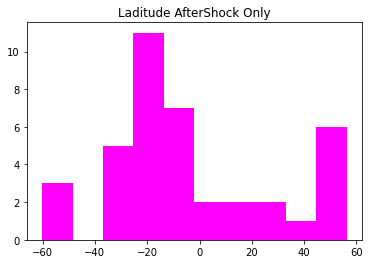

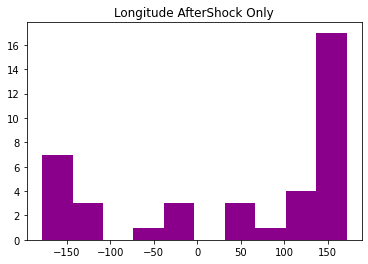

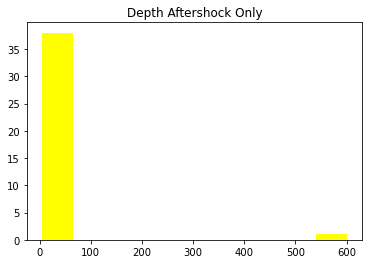

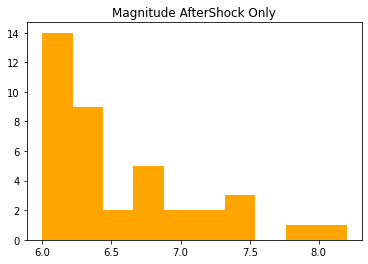

In [207]:
from matplotlib import pyplot 
ladArr = []
longArr = []
filtLadArr = []
filtLongArr = []
depthArr = []
filtDepthArr = []
magArr = []
filtMagArr = []
for i in dataSetFilt:
    ladArr.append(i[0])
    longArr.append(i[1])
    depthArr.append(i[2])
    magArr.append(i[3])
    if (i[len(i)-1]==1):
        filtLadArr.append(i[0])
        filtLongArr.append(i[1])
        filtDepthArr.append(i[2])
        filtMagArr.append(i[3])
varList = [ladArr,longArr,depthArr,magArr,filtLadArr,filtLongArr,filtDepthArr,filtMagArr]
names = ["Laditude","Longitude","Depth","Magnitude","Laditude AfterShock Only","Longitude AfterShock Only", "Depth Aftershock Only", "Magnitude AfterShock Only"]
colors = ["red","blue", "darkred","skyblue","magenta", "darkmagenta", "yellow","orange"]
for i in range(len(varList)):
    pyplot.hist(array(varList[i]),color = colors[i])
    pyplot.title(names[i])
    pyplot.show() 
    